<a href="https://colab.research.google.com/github/Gabriel-MR/desigualdade-de-renda/blob/main/Projeto_semestral_Ci%C3%AAncia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto ciência de dados - Desigualdade de renda

GitHub do projeto (preferencialmente como organização) constando minimamente:

- readme do projeto

- Notebooks python do projeto, com .ipynb 100% executáveis com a aquisição, preparação e todas as análises desenvolvidas. Os notebooks devem ser contruídos na forma de um Relatório tendo, além dos códigos,

- uma Descrição dos Procedimentos e Resultados.

- Datafólio de resultados

- Dados originais empregados (ou links de acesso) e dados intermediários produzidos. Os notebooks devem acessar os dados e executarem sem a necessidade de procedimentos externos (como download ou upload de dados pelo usuário)

- Referências

- Link para o vídeos (se houverem) da apresentação técnica e do datafólio.

## Extraindo os dados

### Importando bibliotecas

In [ ]:
# https://wid.world/data/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Carregando os dados em DataFrame

In [ ]:
'''
Estamos considerando
indicadores: Pall, P0p50, P50p90, P90p100, P99p100
Países: Brasil, EUA, China
'''
# Carregar dados da base do wid worlf data
df = pd.read_csv('https://raw.githubusercontent.com/Gabriel-MR/ciencia-de-dados/main/WID_Data_08052023-120436.csv', 
                 engine='python')
df.head()


,Country,Indicator,Percentile,Year,Value
0,Brazil,gptinc_pall_992_j_BR,pall,1913,Unnamed: 4
1,Brazil,gptinc_pall_992_j_BR,pall,1914,NaN
2,Brazil,gptinc_pall_992_j_BR,pall,1915,NaN
3,Brazil,gptinc_pall_992_j_BR,pall,1916,NaN
4,Brazil,gptinc_pall_992_j_BR,pall,1917,NaN


In [ ]:
df.shape


(1635, 5)

In [ ]:
# Carregando os metadatas com a explicação de cada indicador
df_metadata = pd.read_csv('https://raw.githubusercontent.com/Gabriel-MR/ciencia-de-dados/main/WID_Metadata_08052023-120436.csv', 
                 skiprows=1, sep=';', engine='python')
df_metadata.head()


,Country Code,Country Name,WID Variable code,Percentile group,Unit,Variable name,Intuitive description,Technical description,Methodological Notes,Sources,Extrapolations,Data points
0,BR,Brazil,gptinc992j,p0p100,NaN,Pre-tax national income. Gini coefficient Adul...,NaN,Pre-tax national income =Pre-tax labor income ...,NaN,"After 2001, [URL][URL_LINK]http://wordpress.wi...","[[1820, 2000], [2020, 2021]]",NaN
1,BR,Brazil,sptinc992j,p0p50,share,Pre-tax national income. Share Adults. equal-s...,Pre-tax national income share held by the p0p5...,Pre-tax national income =Pre-tax labor income ...,NaN,"After 2001, [URL][URL_LINK]http://wordpress.wi...","[[1820, 2000], [2020, 2021]]",NaN
2,BR,Brazil,sptinc992j,p50p90,share,Pre-tax national income. Share Adults. equal-s...,Pre-tax national income share held by the p50p...,Pre-tax national income =Pre-tax labor income ...,NaN,"After 2001, [URL][URL_LINK]http://wordpress.wi...","[[1820, 2000], [2020, 2021]]",NaN
3,BR,Brazil,sptinc992j,p90p100,share,Pre-tax national income. Share Adults. equal-s...,Pre-tax national income share held by the p90p...,Pre-tax national income =Pre-tax labor income ...,NaN,"After 2001, [URL][URL_LINK]http://wordpress.wi...","[[1820, 2000], [2020, 2021]]",NaN
4,BR,Brazil,sptinc992j,p99p100,share,Pre-tax national income. Share Adults. equal-s...,Pre-tax national income share held by the p99p...,Pre-tax national income =Pre-tax labor income ...,NaN,"After 2001, [URL][URL_LINK]http://wordpress.wi...","[[1820, 2000], [2020, 2021]]",NaN


In [ ]:
'''
Values por Indicadores não Nan
Indica quais indicadores possuem mais valores não Nan, isso é necessário para
vermos os indicadores que possuem mais dados para a análise
'''
df.dropna()[['Indicator']].groupby('Indicator').size().reset_index(name='Count').sort_values('Indicator')


,Indicator,Count
0,gptinc_pall_992_j_BR,43
1,gptinc_pall_992_j_CN,44
2,gptinc_pall_992_j_US,109
3,sptinc_p0p50_992_j_BR,48
4,sptinc_p0p50_992_j_CN,50
5,sptinc_p0p50_992_j_US,109
6,sptinc_p50p90_992_j_BR,42
7,sptinc_p50p90_992_j_CN,44
8,sptinc_p50p90_992_j_US,109
9,sptinc_p90p100_992_j_BR,48


## Preparação dos dados

### Padronizando e transformando os dados

In [ ]:
'''
A coluna Country já possui os valores padronizados
'''
df['Country'].unique()


array(['Brazil', 'China', 'USA'], dtype=object)

In [ ]:
'''
A coluna Indicator já possui os valores padronizados
'''
df['Indicator'].unique()


array(['gptinc_pall_992_j_BR', 'sptinc_p0p50_992_j_BR',
       'sptinc_p50p90_992_j_BR', 'sptinc_p90p100_992_j_BR',
       'sptinc_p99p100_992_j_BR', 'gptinc_pall_992_j_CN',
       'sptinc_p0p50_992_j_CN', 'sptinc_p50p90_992_j_CN',
       'sptinc_p90p100_992_j_CN', 'sptinc_p99p100_992_j_CN',
       'gptinc_pall_992_j_US', 'sptinc_p0p50_992_j_US',
       'sptinc_p50p90_992_j_US', 'sptinc_p90p100_992_j_US',
       'sptinc_p99p100_992_j_US'], dtype=object)

In [ ]:
'''
A coluna Percentile já possui os valores padronizados
'''
df['Percentile'].unique()


array(['pall', 'p0p50', 'p50p90', 'p90p100', 'p99p100'], dtype=object)

In [ ]:
'''
A coluna Year já possui os valores padronizados
'''
df['Year'].unique()


array([1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
'''
A coluna Value não possui os valores padronizados.
Existem valores Nan e valores String nesse campo
'''
# Valores não numéricos no campo Value
count_nan = df.isna().sum()
values_nan = count_nan['Value']
print(f'Existem {values_nan} valores Nan na coluna Values')

'''
Remover os separadores de milhares da coluna
Motivo: pd.to_numeric não trabakha bem com separados nos números
'''
df['Value'] = df['Value'].str.replace('.', '', regex=False)

transformed_values = pd.to_numeric(df['Value'], errors='coerce')
values_not_numeric = transformed_values.isna().sum()
print(f'Existem {values_not_numeric} valores não numéricos (String e Nan) na coluna Values')


Existem 623 valores Nan na coluna Values
Existem 624 valores não numéricos (String e Nan) na coluna Values


In [ ]:
'''
Converter valores não numéricos para Nan, remover inconsistências
'''
transformed_values = pd.to_numeric(df['Value'], errors='coerce')
df['Value'] = transformed_values

df.shape


(1635, 5)

In [ ]:
# Considerando dados a partir de 2000
df = df.loc[df['Year']>=2000]
df.shape


(330, 5)

### Criando DataFrame para cada Percentile e para cada Country

In [ ]:
'''
Dataframes separados por país e indicadores para serem visualizados nos gráficos
'''
# pall
percentile = 'pall'
df_pall_brazil = df.loc[(df['Country'] == 'Brazil') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_pall_china = df.loc[(df['Country'] == 'China') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_pall_usa = df.loc[(df['Country'] == 'USA') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]

# p0p50
percentile = 'p0p50'
df_p0p50_brazil = df.loc[(df['Country'] == 'Brazil') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p0p50_china = df.loc[(df['Country'] == 'China') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p0p50_usa = df.loc[(df['Country'] == 'USA') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]

# p50p90
percentile = 'p50p90'
df_p50p90_brazil = df.loc[(df['Country'] == 'Brazil') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p50p90_china = df.loc[(df['Country'] == 'China') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p50p90_usa = df.loc[(df['Country'] == 'USA') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]

# p90p100
percentile = 'p90p100'
df_p90p100_brazil = df.loc[(df['Country'] == 'Brazil') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p90p100_china = df.loc[(df['Country'] == 'China') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p90p100_usa = df.loc[(df['Country'] == 'USA') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]

# p99p100
percentile = 'p99p100'
df_p99p100_brazil = df.loc[(df['Country'] == 'Brazil') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p99p100_china = df.loc[(df['Country'] == 'China') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]
df_p99p100_usa = df.loc[(df['Country'] == 'USA') & (df['Percentile'] == percentile)][['Country',	'Indicator', 'Percentile', 'Year', 'Value']]


### Dropando valores Nan da coluna Value

In [ ]:
'''
Dropando valores Nan para desconsiderar a falta de registros na base de dados
'''
# Brazil
df_pall_brazil.dropna(inplace=True)
df_p0p50_brazil.dropna(inplace=True)
df_p50p90_brazil.dropna(inplace=True)
df_p90p100_brazil.dropna(inplace=True)
df_p99p100_brazil.dropna(inplace=True)

# Eua
df_pall_usa.dropna(inplace=True)
df_p0p50_usa.dropna(inplace=True)
df_p50p90_usa.dropna(inplace=True)
df_p90p100_usa.dropna(inplace=True)
df_p99p100_usa.dropna(inplace=True)

# China
df_pall_china.dropna(inplace=True)
df_p0p50_china.dropna(inplace=True)
df_p50p90_china.dropna(inplace=True)
df_p90p100_china.dropna(inplace=True)
df_p99p100_china.dropna(inplace=True)

'''
Uma outra hipótese seria utilizar:

# Preencha os registros faltantes com base no registro anterior
df_pall_brazil.fillna(method='ffill', inplace=True)

Porém, dessa forma estamos alterando/'forçando' o dado base
'''


"\nUma outra hipótese seria utilizar:\n\n# Preencha os registros faltantes com base no registro anterior\ndf_pall_brazil.fillna(method='ffill', inplace=True)\n\nPorém, dessa forma estamos alterando/'forçando' o dado base\n"

In [ ]:
df_pall_brazil.shape

(22, 5)

### Removendo outliers de cada dataframe

In [ ]:
'''
Removemos os outliers antes de criar os gráficos para evitar distorções e obter
uma representação mais precisa dos dados
'''
# Método do Intervalo Interquartil (IQR)

k = 1.5

#### Brazil

##### df_pall_brazil

In [ ]:
Q1 = df_pall_brazil['Value'].quantile(0.25)
Q3 = df_pall_brazil['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_pall_brazil = df_pall_brazil[(df_pall_brazil['Value'] >= limite_inferior) & (df_pall_brazil['Value'] <= limite_superior)]
df_pall_brazil.head()


,Country,Indicator,Percentile,Year,Value
87,Brazil,gptinc_pall_992_j_BR,pall,2000,7.033325e+11
88,Brazil,gptinc_pall_992_j_BR,pall,2001,7.033324e+11
89,Brazil,gptinc_pall_992_j_BR,pall,2002,6.983631e+11
90,Brazil,gptinc_pall_992_j_BR,pall,2003,7.009310e+11
91,Brazil,gptinc_pall_992_j_BR,pall,2004,6.957800e+11


##### df_p0p50_brazil

In [ ]:
Q1 = df_p0p50_brazil['Value'].quantile(0.25)
Q3 = df_p0p50_brazil['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p0p50_brazil = df_p0p50_brazil[(df_p0p50_brazil['Value'] >= limite_inferior) & (df_p0p50_brazil['Value'] <= limite_superior)]
df_p0p50_brazil.shape


(21, 5)

##### df_p50p90_brazil

In [ ]:
Q1 = df_p50p90_brazil['Value'].quantile(0.25)
Q3 = df_p50p90_brazil['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p50p90_brazil = df_p50p90_brazil[(df_p50p90_brazil['Value'] >= limite_inferior) & (df_p50p90_brazil['Value'] <= limite_superior)]
df_p50p90_brazil.shape


(21, 5)

##### df_p90p100_brazil

In [ ]:
Q1 = df_p90p100_brazil['Value'].quantile(0.25)
Q3 = df_p90p100_brazil['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p90p100_brazil = df_p90p100_brazil[(df_p90p100_brazil['Value'] >= limite_inferior) & (df_p90p100_brazil['Value'] <= limite_superior)]
df_p90p100_brazil.shape


(20, 5)

##### df_p99p100_brazil

In [ ]:
Q1 = df_p99p100_brazil['Value'].quantile(0.25)
Q3 = df_p99p100_brazil['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p99p100_brazil = df_p99p100_brazil[(df_p99p100_brazil['Value'] >= limite_inferior) & (df_p99p100_brazil['Value'] <= limite_superior)]
df_p99p100_brazil.shape


(21, 5)

#### Eua

##### df_pall_eua

In [ ]:
Q1 = df_pall_usa['Value'].quantile(0.25)
Q3 = df_pall_usa['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_pall_usa = df_pall_usa[(df_pall_usa['Value'] >= limite_inferior) & (df_pall_usa['Value'] <= limite_superior)]
df_pall_usa.shape


(21, 5)

##### df_p0p50_eua

In [ ]:
Q1 = df_p0p50_usa['Value'].quantile(0.25)
Q3 = df_p0p50_usa['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p0p50_usa = df_p0p50_usa[(df_p0p50_usa['Value'] >= limite_inferior) & (df_p0p50_usa['Value'] <= limite_superior)]
df_p0p50_usa.shape


(21, 5)

##### df_p50p90_eua

In [ ]:
Q1 = df_p50p90_usa['Value'].quantile(0.25)
Q3 = df_p50p90_usa['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p50p90_usa = df_p50p90_usa[(df_p50p90_usa['Value'] >= limite_inferior) & (df_p50p90_usa['Value'] <= limite_superior)]
df_p50p90_usa.shape


(20, 5)

##### df_p90p100_eua

In [ ]:
Q1 = df_p90p100_usa['Value'].quantile(0.25)
Q3 = df_p90p100_usa['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p90p100_usa = df_p90p100_usa[(df_p90p100_usa['Value'] >= limite_inferior) & (df_p90p100_usa['Value'] <= limite_superior)]
df_p90p100_usa.shape


(20, 5)

##### df_p99p100_eua

In [ ]:
Q1 = df_p99p100_usa['Value'].quantile(0.25)
Q3 = df_p99p100_usa['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p99p100_usa = df_p99p100_usa[(df_p99p100_usa['Value'] >= limite_inferior) & (df_p99p100_usa['Value'] <= limite_superior)]
df_p99p100_usa.shape


(19, 5)

#### China

##### df_pall_china

In [ ]:
Q1 = df_pall_china['Value'].quantile(0.25)
Q3 = df_pall_china['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_pall_china = df_pall_china[(df_pall_china['Value'] >= limite_inferior) & (df_pall_china['Value'] <= limite_superior)]
df_pall_china.shape


(19, 5)

##### df_p0p50_china

In [ ]:
Q1 = df_p0p50_china['Value'].quantile(0.25)
Q3 = df_p0p50_china['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p0p50_china = df_p0p50_china[(df_p0p50_china['Value'] >= limite_inferior) & (df_p0p50_china['Value'] <= limite_superior)]
df_p0p50_china.shape


(19, 5)

##### df_p50p90_china

In [ ]:
Q1 = df_p50p90_china['Value'].quantile(0.25)
Q3 = df_p50p90_china['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p50p90_china = df_p50p90_china[(df_p50p90_china['Value'] >= limite_inferior) & (df_p50p90_china['Value'] <= limite_superior)]
df_p50p90_china.shape


(18, 5)

##### df_p90p100_china

In [ ]:
Q1 = df_p90p100_china['Value'].quantile(0.25)
Q3 = df_p90p100_china['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p90p100_china = df_p90p100_china[(df_p90p100_china['Value'] >= limite_inferior) & (df_p90p100_china['Value'] <= limite_superior)]
df_p90p100_china.shape


(18, 5)

##### df_p99p100_china

In [ ]:
Q1 = df_p99p100_china['Value'].quantile(0.25)
Q3 = df_p99p100_china['Value'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - k * IQR
limite_superior = Q3 + k * IQR

df_p99p100_china = df_p99p100_china[(df_p99p100_china['Value'] >= limite_inferior) & (df_p99p100_china['Value'] <= limite_superior)]
df_p99p100_china.shape


(19, 5)

## Visualização de dados

In [ ]:
# Modo artist layer

# Criar figura e eixos com duas linhas e três colunas de subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Subplot para a comparação entre Brasil, EUA e China
axs[0, 0].plot(df_pall_brazil['Year'], df_pall_brazil['Value'], label='Brasil')
axs[0, 0].plot(df_pall_usa['Year'], df_pall_usa['Value'], label='EUA')
axs[0, 0].plot(df_pall_china['Year'], df_pall_china['Value'], label='China')
axs[0, 0].set_xlabel('Ano')
axs[0, 0].set_ylabel('Indíce')
axs[0, 0].set_title('Comparação pall entre Brasil, EUA e China')
axs[0, 0].legend()

# Subplot para os dados p0p50 (percentile 0-50)
axs[0, 1].plot(df_p0p50_brazil['Year'], df_p0p50_brazil['Value'], label='Brasil')
axs[0, 1].plot(df_p0p50_usa['Year'], df_p0p50_usa['Value'], label='EUA')
axs[0, 1].plot(df_p0p50_china['Year'], df_p0p50_china['Value'], label='China')
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('Indíce')
axs[0, 1].set_title('Comparação p0p50 entre Brasil, EUA e China')
axs[0, 1].legend()

# Subplot para os dados p50p90 (percentile 50-90)
axs[0, 2].plot(df_p50p90_brazil['Year'], df_p50p90_brazil['Value'], label='Brasil')
axs[0, 2].plot(df_p50p90_usa['Year'], df_p50p90_usa['Value'], label='EUA')
axs[0, 2].plot(df_p50p90_china['Year'], df_p50p90_china['Value'], label='China')
axs[0, 2].set_xlabel('Ano')
axs[0, 2].set_ylabel('Indíce')
axs[0, 2].set_title('Comparação p50p90 entre Brasil, EUA e China')
axs[0, 2].legend()

# Subplot para os dados p90p100 (percentile 90-100)
axs[1, 0].plot(df_p90p100_brazil['Year'], df_p90p100_brazil['Value'], label='Brasil')
axs[1, 0].plot(df_p90p100_usa['Year'], df_p90p100_usa['Value'], label='EUA')
axs[1, 0].plot(df_p90p100_china['Year'], df_p90p100_china['Value'], label='China')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('Indíce')
axs[1, 0].set_title('Comparação p90p100 entre Brasil, EUA e China')
axs[1, 0].legend()

# Subplot para os dados p99p100 (percentile 99-100)
axs[1, 1].plot(df_p99p100_brazil['Year'], df_p99p100_brazil['Value'], label='Brasil')
axs[1, 1].plot(df_p99p100_usa['Year'], df_p99p100_usa['Value'], label='EUA')
axs[1, 1].plot(df_p99p100_china['Year'], df_p99p100_china['Value'], label='China')
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('Indíce')
axs[1, 1].set_title('Comparação p99p100 entre Brasil, EUA e China')
axs[1, 1].legend()

# Ajustar a disposição dos subplots
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Conclusões

### Conclusão geral

#### Indicadores Pall P90p100 e P99p100
**Pall**: Indica o grau de concentração de renda nas mãos dos mais ricos. <br>
**P90p100**: Indica a parcela da renda que está concentrada nos estratos superiores da população. <br>
**P99p100**: Indica o grau de concentração extrema de renda nas mãos de uma pequena parcela da população. <br> <br>
O Brasil possui um alto indíce dessdes indicadores em comparação aos EUA e a China, porém está em ritmo desacelerado em comparação ao ano 2000, queda em valores absolutos.
<br>
Eua e China possuem índices menos, porém com um aumento nos valores absolutos.
<br>

#### Indicadores P0p50 e P50p90
**P0p50**: Indica a fatia da renda que é destinada aos 50% mais pobres. <br>
**P50p90**: Indica a distribuição de renda entre a classe média. <br> <br>
Nota-se que, em valores absolutos, Os EUA e a China estão em queda e o Brasil apresentou um aumento.
É importante ressaltar que o Brasil possui valores bem menores para esses índices.





### Conclusão Covid-19

#### Indicador pall
Durante a pandemia do Covid-19 o Brasil juntamente com os EUA apresentaram uma elevação do índice, maior concentração de renda nas mãos dos mais ricos. Já a China, nesse mesmo período, fechou em queda.

#### Indicador P0p50
Durante a pandemia do Covid-19 Os Eua e a China apresentaram queda do índice, diminuição da fatia da renda que é destinada aos 50% mais pobres. Já o Brasil apresentou aumento crescimento dessa fatia.

#### Indicador p50p90
Duarnte a pandemia do Covid-19 a China e o Brasil apresentaram queda do índice, mostrando que a distribuição de renda entre a classe média diminuiu. já os EUA apresentaram um leve aumento no começo da pandemia mas finalizou em queda.

#### Indicador p90p100
Duarente a pandemia do Covid-19 a China e os Brasil apresentaram aumento, a parcela da renda que está concentrada nos estratos superiores da população aumentou.já os EUA apresentaram uma diminuição do índice.

#### Indicador p99p100
Os três países apresentam aumento nesse período de pandemia, indicanado que o grau de concentração extrema de renda nas mãos de uma pequena parcela da população aumentou.

## Machine learning

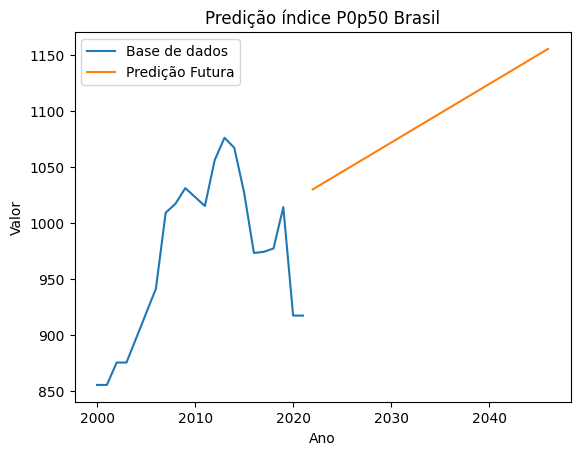

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados DataFrame
years = df_p0p50_brazil['Year'].values.reshape(-1, 1)
values = df_p0p50_brazil['Value'].values

# Criar um objeto do modelo
regression = LinearRegression()

# Treinar modelo
regression.fit(years, values)

# Criar um array com a próxima geração (25 anos)
future_years = np.arange(2022, 2047).reshape(-1, 1)

# Predição para a próxima geração(25 anos)
predicted_values = regression.predict(future_years)

# Plotar o gráfico com os dados existentes
plt.plot(years, values, label='Base de dados')

# Plotar o gráfico com a predição futura
plt.plot(future_years, predicted_values, label='Predição Futura')

# Definir os rótulos dos eixos
plt.xlabel('Ano')
plt.ylabel('Valor')

# Definir o título do gráfico
plt.title('Predição índice P0p50 Brasil')

# Adicionar uma legenda
plt.legend()

# Exibir o gráfico
plt.show()


## Conclusão Machine Learning


Embora a regressão linear não seja a abordagem mais adequada para esse caso, uma vez que os índices de desigualdade não são necessariamente lineares, podemos tentar fazer uma aproximação da tendência. Ao analisarmos os dados, observamos que há uma tendência de aumento nesse indicador para a próxima geração (25 anos).